In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import SGD,Adam
device = torch.device('cuda:0')

In [2]:
def plots(x,out,y):
    x = x.cpu()
    x = x.data.numpy()
    x.resize(50,1)
    out = out.cpu()
    out = out.data.numpy()
    out.resize(50,1)
    y = y.cpu()
    y = y.data.numpy()
    y.resize(50,1)
    plt.plot(x,out,x,y)
    plt.show()

In [3]:
x = np.linspace(0,2*np.pi)
y = np.sin(np.linspace(0,2*np.pi))
input_size = 1
hidden_size = 1
batch_size = 1
num_layers = 4
seq_len = 50

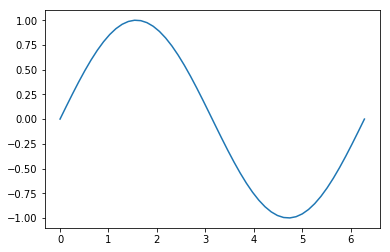

In [4]:
plt.plot(x,y)

In [5]:
class lstm(nn.Module):
    def __init__(self):
        super().__init__()
        self.batch_size = batch_size
        self.seq_len = seq_len
        self.num_layers = num_layers
        self.input_size = input_size
        self.rnn = nn.LSTM(input_size = input_size, hidden_size=hidden_size, num_layers = num_layers , batch_first = True)
    def forward(self,x,hidden):
        out,(h0,c0) = self.rnn(x,hidden)
        return out,(h0,c0)
    def init_hidden(self):
        #sung kim: num_layers*num_directions, batch, hidden_size
        h0 = torch.zeros(self.num_layers,batch_size,self.input_size).type(torch.cuda.FloatTensor)
        c0 = torch.zeros(self.num_layers,batch_size,self.input_size).type(torch.cuda.FloatTensor)
        return (h0,c0)

In [6]:
try:
    x = Variable(torch.from_numpy(x).view(1,50,1)).type(torch.cuda.FloatTensor)
    y = Variable(torch.from_numpy(y).view(1,50,1)).type(torch.cuda.FloatTensor)
except:
    pass

In [7]:
model = lstm().cuda()
criterion  = nn.MSELoss()
optimizer = Adam(model.parameters(), lr = 0.01)

Loss on 0 epoch : 0.6394355297088623


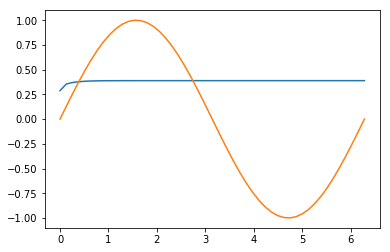

Loss on 100 epoch : 0.11173392087221146


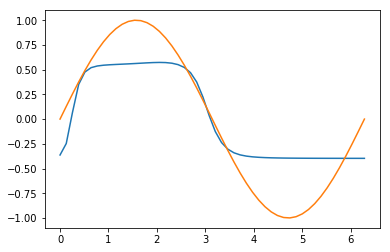

Loss on 200 epoch : 0.05134628340601921


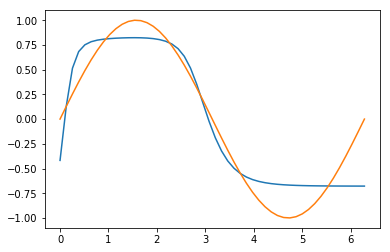

Loss on 300 epoch : 0.04612497240304947


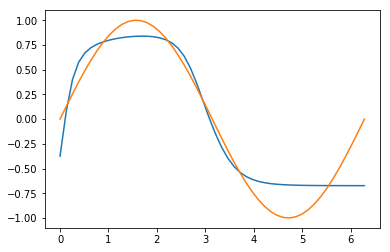

Loss on 400 epoch : 0.04323555901646614


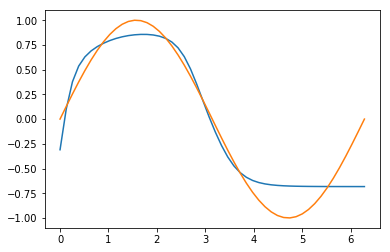

In [8]:
(h0,c0) = model.init_hidden()
for epoch in range(500):
    optimizer.zero_grad()
    out,(h0,c0) = model(x,(h0,c0))
    loss = criterion(out,y)
    loss.backward(retain_graph=True)
    optimizer.step()
    if epoch % 100 == 0:
        print('Loss on {} epoch : {}'.format(epoch,loss.item()))
        plots(x,out,y)